In [1]:
# Importing Packages
import networkx  as nx 
# See https://networkx.github.io/ for details
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
G = nx.Graph()
%matplotlib inline

### 1) First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).

In [2]:
# Creating Graph 
graph = {}

# Creating Cities for Graph
graph["NYC"] = {}
graph["DC"]= {}
graph["Atlanta"] = {}
graph["New Orleans"] = {}
graph["Dallas"] = {}
graph["Indianapolis"] = {}
graph["Kansas City"] = {}
graph["Denver"] = {}
graph["Salt Lake City"]= {}
graph["Pittsburgh"] = {}
graph["Cincinatti"] = {}
graph["St Louis"] = {}
graph["Oklahoma City"] = {}
graph["Albuquerque"] = {}
graph["Phoenix"] = {}
graph["Las Vegas"] = {}
graph["San Diego"] = {}
graph["Los Angeles"] = {}



#First Route
graph["NYC"]["DC"] = 1.5
graph["DC"]["Atlanta"] = 2
graph["Atlanta"]["New Orleans"] = 1.5
graph["New Orleans"]["Dallas"] = 1.5
graph["Dallas"]["Albuquerque"] = 2

#Second Route
graph["NYC"]["Indianapolis"] = 3
graph["Indianapolis"]["Kansas City"] = 3.25
graph["Kansas City"]["Denver"] = 2
graph["Denver"]["Salt Lake City"] = 1.5
graph["Salt Lake City"]["Las Vegas"] = 1.5

#Third Route
graph["NYC"]["Pittsburgh"] = 1.5
graph["Pittsburgh"]["Cincinatti"] = 3
graph["Cincinatti"]["St Louis"] = 3.5
graph["St Louis"]["Oklahoma City"] = 1.5
graph["Oklahoma City"]["Albuquerque"] = 5.5

#Final Route
graph["Albuquerque"]["Phoenix"] = 2
graph["Phoenix"]["Las Vegas"] = 2
graph["Las Vegas"]["San Diego"] = 2
graph["San Diego"]["Los Angeles"] = 2
graph["Phoenix"]["San Diego"] = 3
graph["Las Vegas"]["Los Angeles"] = 7
graph["Los Angeles"] = {}


# Creating Costs table
infinity = float("inf")
costs = {}
costs["NYC"] = 0
costs["DC"] = infinity
costs["Atlanta"] = infinity
costs["New Orleans"] = infinity
costs["Dallas"] = infinity
costs["Indianapolis"] = infinity
costs["Kansas City"] = infinity
costs["Denver"] = infinity
costs["Salt Lake City"] = infinity 
costs["Pittsburgh"] = infinity
costs["Cincinatti"] = infinity
costs["St Louis"] = infinity
costs["Oklahoma City"] = infinity
costs["Albuquerque"] = infinity
costs["Phoenix"] = infinity
costs["Las Vegas"] = infinity
costs["San Diego"] = infinity
costs["Los Angeles"] = infinity


# Creating Parents table
parents = {}
parents["DC"] = "NYC"
parents["Atlanta"] = "DC"
parents["New Orleans"] = "Atlanta"
parents["Indianapolis"] = "New Orleans"
parents["Kansas City"] = "Indianapolis"
parents["Denver"] = "Kansas City"
parents["Salt Lake City"] = "Denver"
parents["Pittsburgh"] = "Salt Lake City"
parents["Cincinatti"] = "Pittsburgh"
parents["St Louis"] = "Cincinatti"
parents["Oklahoma City"] = "St Louis"
parents["Albuquerque"] = "Oklahoma City"
parents["Phoenix"] = "Albuquerque"
parents["Las Vegas"] = "Phoenix"
parents["San Diego"] = "Las Vegas"
parents["Los Angeles"] = "San Diego"
# parents["Los Angeles"] = None

In [3]:
# Trace Path
def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path
        
# Breadth-First Search Algorithm
def bfs(graph, start, end):
    parent = {}
    queue = []
    queue.append(start)
    while queue:
        node = queue.pop(0)
        if node == end:
            return backtrace(parent, start, end)
        for adjacent in graph.get(node, []):
            if node not in queue :
                parents[adjacent] = node # <<<<< record its parent 
                queue.append(adjacent)

In [4]:
# Searching level 1 of network
level_1 = []
for i in range(100):
    start = time.time()
    bfs(graph, 'NYC', 'NYC')
    end = time.time()
    level_1.append((end - start) * 1000)
    
level1_time = np.mean(level_1)


# Searching level 2 of network
level_2 = []

for i in range(100):
    start = time.time()
    bfs(graph, 'NYC', 'NYC')
    bfs(graph, 'Kansas City', 'Indianapolis')
    end = time.time()
    level_2.append((end - start) * 1000)
    
level2_time = np.mean(level_2)

# Searching level 3 of network

level_3 = []

for i in range(100):
    start = time.time()
    bfs(graph, 'NYC', 'NYC')
    bfs(graph, 'Kansas City', 'Indianapolis')
    bfs(graph, 'Salt Lake City', 'Pittsburgh')
    end = time.time()
    level_3.append((end - start) * 1000)
    
level3_time = np.mean(level_3)


# Searching level 4 of network

level_4 = []

for i in range(100):
    start = time.time()
    bfs(graph, 'NYC', 'NYC')
    bfs(graph, 'Kansas City', 'Indianapolis')
    bfs(graph, 'Salt Lake City', 'Pittsburgh')
    bfs(graph, 'Albuquerque', 'Oklahoma City')
    end = time.time()
    level_4.append((end - start) * 1000)
    
level4_time = np.mean(level_4)

# Searching level 5 of network

level_5 = []

for i in range(100):
    start = time.time()
    bfs(graph, 'NYC', 'NYC')
    bfs(graph, 'Kansas City', 'Indianapolis')
    bfs(graph, 'Salt Lake City', 'Pittsburgh')
    bfs(graph, 'Albuquerque', 'Oklahoma City')
    bfs(graph, 'Las Vegas', 'Phoenix')
    end = time.time()
    level_5.append((end - start) * 1000)
    
level5_time = np.mean(level_5)


level_6 = []

for i in range(100):
    start = time.time()
    bfs(graph, 'NYC', 'NYC')
    bfs(graph, 'Kansas City', 'Indianapolis')
    bfs(graph, 'Salt Lake City', 'Pittsburgh')
    bfs(graph, 'Albuquerque', 'Oklahoma City')
    bfs(graph, 'Las Vegas', 'Phoenix')
    bfs(graph, 'Los Angeles', 'San Diego')
    end = time.time()
    level_6.append((end - start) * 1000)
    
level6_time = np.mean(level_6)

### 2) Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [5]:
# Route
print (backtrace(parents, 'NYC', 'Los Angeles'))

bfs_search_agg = level1_time + level2_time + level3_time + level4_time + level5_time + level6_time
print('Breadth-First Search Execution Time:', bfs_search_agg)

['NYC', 'DC', 'Atlanta', 'New Orleans', 'Indianapolis', 'Kansas City', 'Denver', 'Salt Lake City', 'Pittsburgh', 'Cincinatti', 'St Louis', 'Oklahoma City', 'Albuquerque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles']
Breadth-First Search Execution Time: 0.036373138427734375


### 3) Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).

In [6]:
# Dijkstra Algorithm 

processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

# Find the lowest-cost node that you haven't processed yet.
node = find_lowest_cost_node(costs)
# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)

print('Dijkstra\'s Flight Time: ', costs)

Dijkstra's Flight Time:  {'NYC': 0, 'DC': 1.5, 'Atlanta': 3.5, 'New Orleans': 5.0, 'Dallas': 6.5, 'Indianapolis': 3, 'Kansas City': 6.25, 'Denver': 8.25, 'Salt Lake City': 9.75, 'Pittsburgh': 1.5, 'Cincinatti': 4.5, 'St Louis': 8.0, 'Oklahoma City': 9.5, 'Albuquerque': 8.5, 'Phoenix': 10.5, 'Las Vegas': 11.25, 'San Diego': 13.25, 'Los Angeles': 15.25}


### 4) Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [7]:
## Build a trade path backwards
current_node, start_node = 'Los Angeles', 'NYC'

trade_path = [current_node]

while current_node != start_node:
    last_loc = parents[current_node]
    current_node = last_loc
    trade_path.append(last_loc)

trade_path = trade_path[::-1]

print(' ---> '.join(trade_path))


Dijkstra_algorithm = []

for i in range(100):
    start = time.time()
    find_lowest_cost_node(costs)
    end = time.time()
    Dijkstra_algorithm.append((end - start) * 1000)
    
Dijkstra_algorithm_time = np.mean(Dijkstra_algorithm)
    
print('Dijkstra\'s Execution Time: ', Dijkstra_algorithm_time) 


NYC ---> Indianapolis ---> Kansas City ---> Denver ---> Salt Lake City ---> Las Vegas ---> San Diego ---> Los Angeles
Dijkstra's Execution Time:  0.003204345703125


### 5) Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.

In [8]:
cities = ['NYC', 'Kansas City', 'Denver', 'Salt Lake City', 'Las Vegas', 'San Diego', 'Los Angeles']
travel_times = {'City':cities,
    'Breadth-First Search' : bfs_search_agg,
           }
travel_times = pd.DataFrame(data=travel_times)
travel_times

,City,Breadth-First Search
0,NYC,0.036373
1,Kansas City,0.036373
2,Denver,0.036373
3,Salt Lake City,0.036373
4,Las Vegas,0.036373
5,San Diego,0.036373
6,Los Angeles,0.036373


In [9]:
travel_times = {'City':cities,
           'Dijkstra\'s' : Dijkstra_algorithm_time,
           }
travel_times = pd.DataFrame(data=travel_times)
travel_times


,City,Dijkstra's
0,NYC,0.003204
1,Kansas City,0.003204
2,Denver,0.003204
3,Salt Lake City,0.003204
4,Las Vegas,0.003204
5,San Diego,0.003204
6,Los Angeles,0.003204


### 6) Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.

Text(0.5, 1.0, "Execution-Time Values of Breadth-First Search Algorithm & Dijkstra'sAlgorithm")

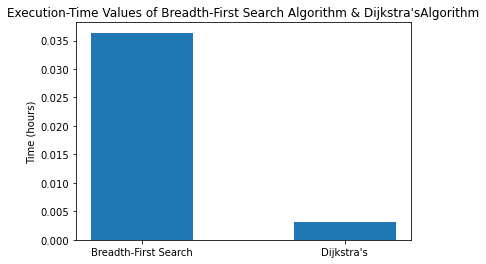

In [10]:
plt.bar([1,2], [bfs_search_agg, Dijkstra_algorithm_time], width=0.5, 
        tick_label=['Breadth-First Search', 'Dijkstra\'s'])
plt.ylabel('Time (hours)')
plt.title('Execution-Time Values of Breadth-First Search Algorithm & Dijkstra\'s' 'Algorithm')

# EXECUTIVE SUMMARY

### Introduction

This report analyzed the speed of Dijkstra's algorithm by comparing it to the speed of the Breadth-First algorithm by executing a search on a network composed of 18 nodes representing U.S cities. Those cities are as follows:

NYC, DC, Atlanta, New Orleans, Dallas, Indianapolis, Kansas City, Denver, Salt Lake City, Pittsburgh, Cincinatti, St Louis, Oklahoma City, Albuquerque, Las Vegas, San Diego, Los Angeles




### Dijkstra's Algorithm

Dijkstra's algorithm allows for the shortest distance between two objects to be computed. The algorithm works by searching a graph which represents a network. The network models a set of connections. This is stated as the network is composed of objects which are nodes, and of connections which are vertices. Dijkstra's algorithm searches the network by examining the network's nodes and weighted vertices and calculates the weight of the path. The search is a function of two parameters. Is there a path from node A to node B? What is the shortest distance between node A and node B? Dijkstra's algorithm defines shortest distance in terms of weighted values. In this report, the weighted values were travel time.

### Industry Application

Dijkstra's algorithm is a commonly implemented solution in various applications. It can be used to find the shortest route during a trip, for instance, in GPS technology. These are the options given when searching for the quickest path during a trip. The argument within a defined function would provide the parameters for determining a vertice's value within a network. In supply-chains, it can be used to determine the cost-value of a path.  

### Methodology

A network was created and composed of 18 U.S. cities. For the Breadth-First Search algorithm, the execution time was appended to six lists to store the values for performance. For Dijkstra's algorithm, the execution time was appended to a list to store the value for performance. The Breadth-First Search algorithm defines the shortest path from node A to node B without factoring in the weight of a vertice while Dijkstra's algorithm defines the shortest path from node A to node B with the weighted vertices factored into the output. 

### Analysis & Results

The results displayed on table 1 show the execution time for the Breadth-first Search algorithm to be 0.036373 milliseconds when searching for the optimal path from New York City to Los Angeles. The results displayed on table 2 show the execution time for Dijkstra's algorithm to be 0.003204 milliseconds when searching for the optimal path from New York City to Los Angeles. 

### Discussion of Big O Notation

Big O notation for Dijkstra's algorithm is O(V^2), where V is equal to the number of vertices and V^2 is equal to the weight of the vertices. Since the algorithm executes a brute-force search of the entire network, the notation is O(Vertice^2). 

### Conclusion

The execution speed of Dijkstra's algorithm in Big O notation is given as O(V^2). This makes it great for searching vertices and their relationships within a network composed of a few nodes or billions of nodes. Consideration should be given to the graph and its size. Different constraint variables can be used to modify the algorithm to produce an optimal result. 